<table align="center" width=100%  >
    <tr>
        <td width="15%">
            <img src="logo.png" >
        </td>
        <td>
            <div align="center" >
                <font color="teal" size=8px >
                    <b> Customer Analytics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table> 

#### E-commerce Shipping Data

### Features Explanation : <br>

<b>ID:</b> ID Number of Customers.<br>
<b>Warehouse block: </b>The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br>
<b>Mode of shipment:</b>The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
<b>Customer care calls:</b> The number of calls made from enquiry for enquiry of the shipment.<br>
<b>Customer rating:</b> The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
<b>Cost of the product: </b>Cost of the Product in US Dollars.<br>
<b>Prior purchases:</b> The Number of Prior Purchase.<br>
<b>Product importance:</b> The company has categorized the product in the various parameter such as low, medium, high.<br>
<b>Gender:</b> Male and Female .<br>
<b>Discount offered:</b> Discount offered on that specific product.<br>
<b>Weight in gms:</b> It is the weight in grams.<br>
<b>Reached on time:</b> It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [206]:
# Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,f1_score,plot_roc_curve,roc_auc_score,mean_squared_error,confusion_matrix
from sklearn.model_selection import cross_val_score
!pip install xgboost
from xgboost import XGBClassifier
from sklearn import metrics



In [187]:
# Load Dataset with first five observation
cust_anaytics = pd.read_csv('Shipping Data.csv')

df_ca = cust_anaytics.copy()
df_ca.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [188]:
# dataset has 10999 rows and 12 columns
df_ca.shape

(10999, 12)

In [189]:
# information of dataset
df_ca.info()                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [190]:
# check for null values
df_ca.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

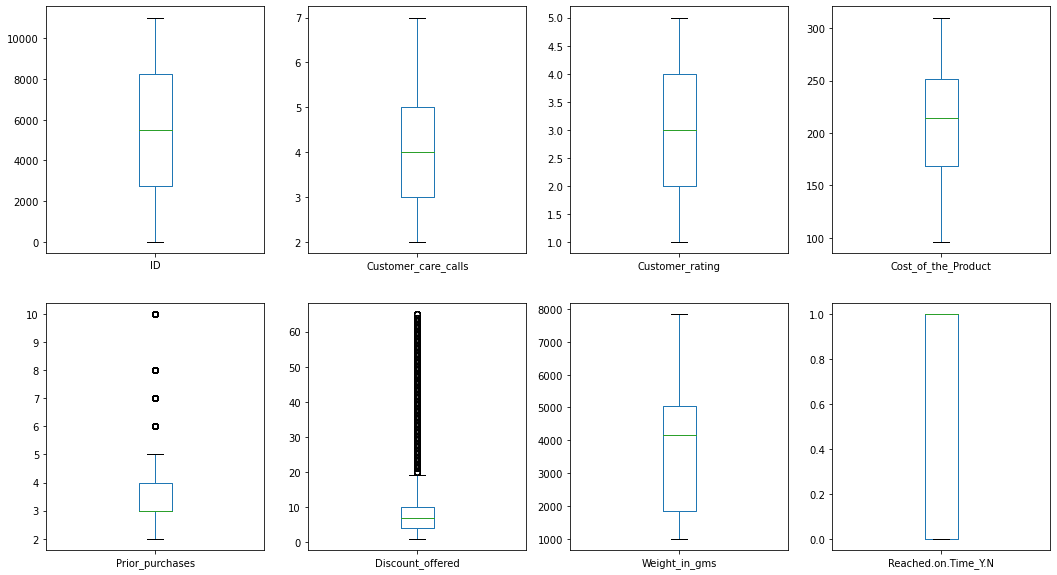

In [191]:
# checking for outliers
df_ca.plot(kind='box',subplots=True,layout=(2,4),figsize=(18,10))
plt.show()

Prior purchases and Discount offered has outliers.

In [192]:
#Separating numerical and categorical variable .
cat = df_ca.select_dtypes(include='object')
num = df_ca.select_dtypes(include='number')

In [193]:
# Getting unique values of categorical features using loop.
for col in  cat.columns:
    print(col, ' contains ', cat[col].unique(),'(',len(cat[col].unique()) ,' values)''\n')

Warehouse_block  contains  ['D' 'F' 'A' 'B' 'C'] ( 5  values)

Mode_of_Shipment  contains  ['Flight' 'Ship' 'Road'] ( 3  values)

Product_importance  contains  ['low' 'medium' 'high'] ( 3  values)

Gender  contains  ['F' 'M'] ( 2  values)



In [194]:
# Count of each value in target variable.
df_ca['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

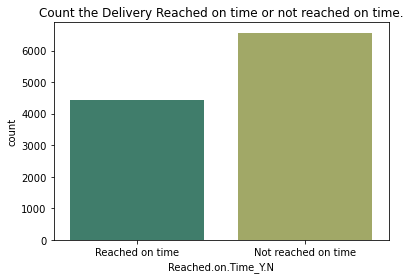

In [195]:
# target values Distribution
labels = ['Reached on time','Not reached on time']
plt.title('Count the Delivery Reached on time or not reached on time.')
sns.countplot(df_ca['Reached.on.Time_Y.N'],palette='gist_earth')
plt.xticks([0,1],labels, rotation ='0')
plt.show()

The target variable is not equally distributed(Imbalanced).

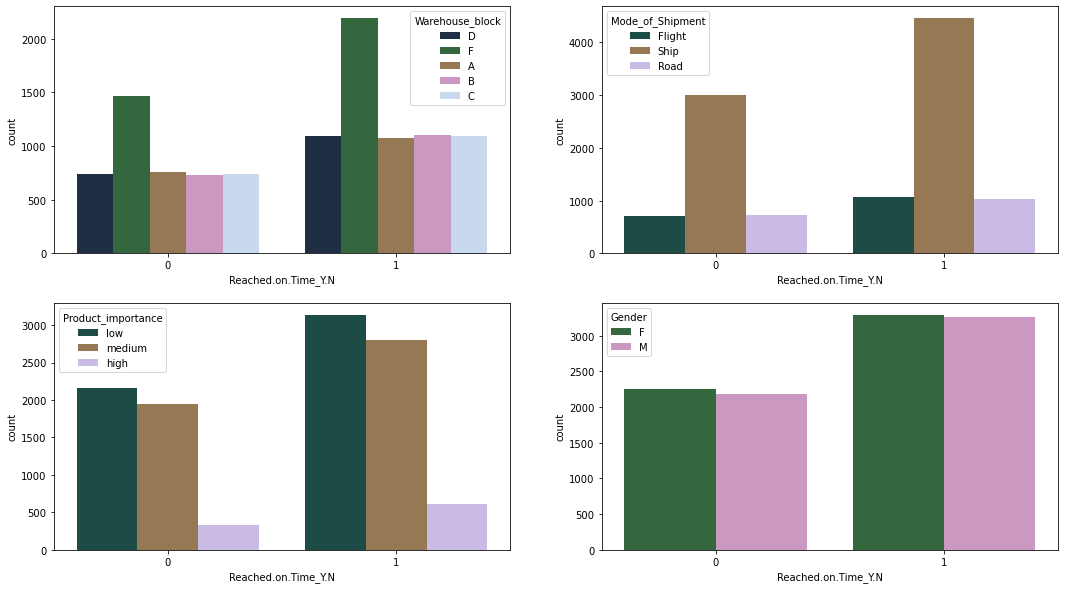

In [196]:
# Barplot to show relation between dependent and independent variables using loop.
i = 1
plt.figure(figsize=(18,10))

for col in cat.columns:
    plt.subplot(2,2,i)
    sns.countplot(x=df_ca['Reached.on.Time_Y.N'],hue=df_ca[col],palette='cubehelix')
    i+=1

#### Insights<br>
Warehouse F has high value count of getting delivery reached on time and not reached on time.<br>
The count of delivery through ship is more as compare to flight and road.<br>
Product of low importance value count is more for reach on time and not reach on time.<br>
for gender , males and females have nearly equal who deliver on time and not deliver on time.

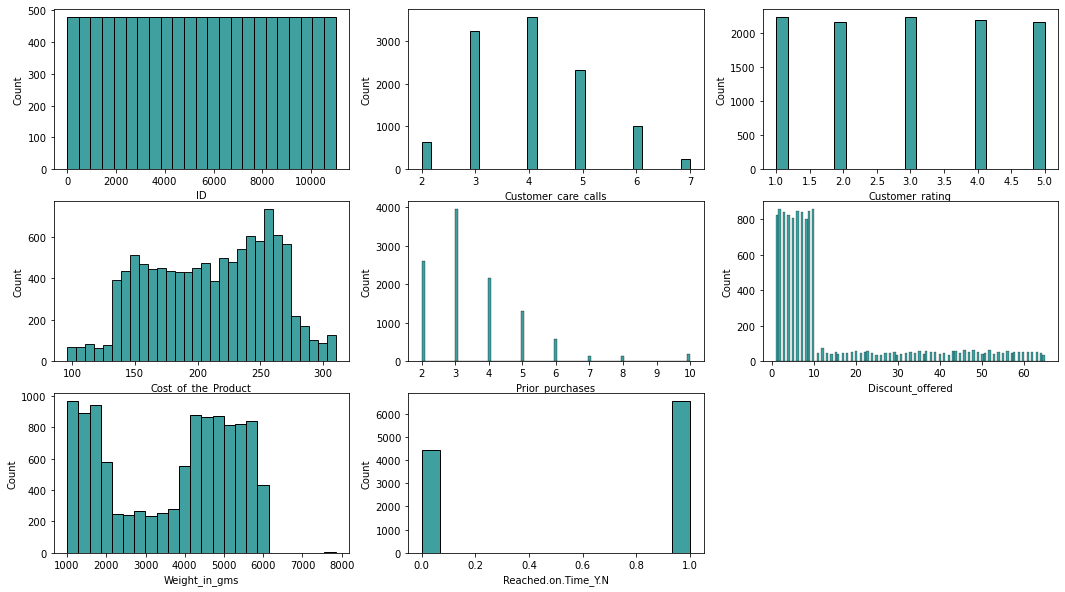

In [197]:
# Histogram for numerical features.
i = 1
plt.figure(figsize=(18,10))
for col in num.columns:
    plt.subplot(3,3,i)
    sns.histplot(x=df_ca[col],color='teal')
    i+=1

#### Insights <br>
Mostly people call 4 times to custome care.<br>
customer rating count is nearly equal .<br>
Range of Product is from 90 to 330.<br>
Mostly people purchases 3 times.<br>
Mostly Product are on discount from 1% to 10 % but on some product , discount is given upto 60%.<br>
The Weight range of product is from 1000gms to 6000 gms.<br>
Count for delivery not reached on time is more than delivery reached on time.

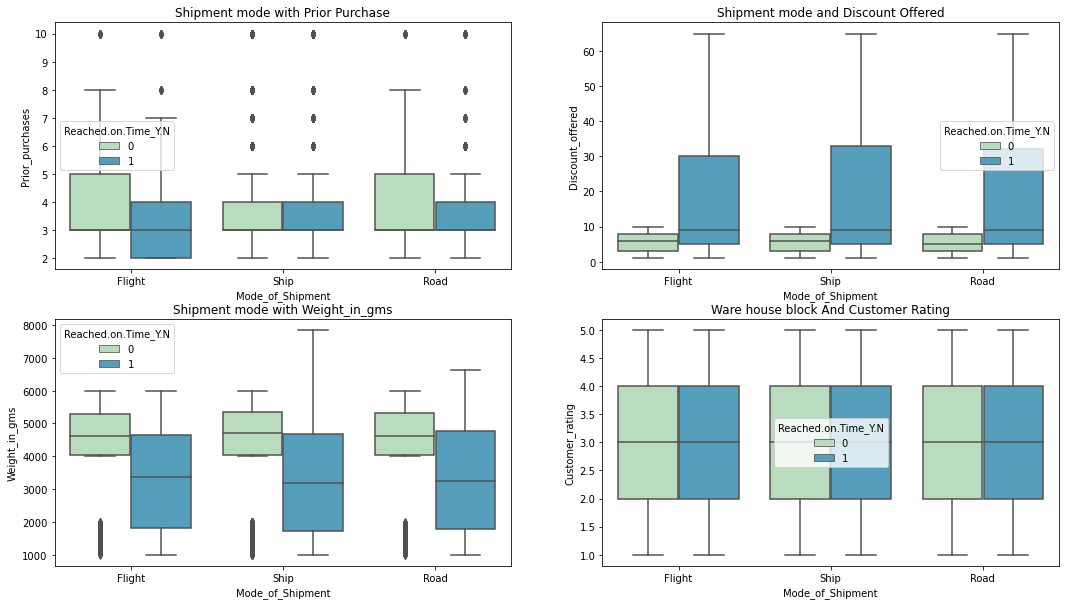

In [198]:
# 
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.title('Shipment mode with Prior Purchase')
sns.boxplot(df_ca['Mode_of_Shipment'],df_ca['Prior_purchases'],hue=df_ca['Reached.on.Time_Y.N'],palette='GnBu')

plt.subplot(2,2,2)
plt.title('Shipment mode and Discount Offered')
sns.boxplot(df_ca['Mode_of_Shipment'],df_ca['Discount_offered'],hue=df_ca['Reached.on.Time_Y.N'],palette='GnBu')
plt.subplot(2,2,3)
plt.title('Shipment mode with Weight_in_gms')
sns.boxplot(df_ca['Mode_of_Shipment'],df_ca['Weight_in_gms'],hue=df_ca['Reached.on.Time_Y.N'],palette='GnBu')

plt.subplot(2,2,4)
plt.title('Ware house block And Customer Rating')
sns.boxplot(df_ca['Mode_of_Shipment'],df_ca['Customer_rating'],hue=df_ca['Reached.on.Time_Y.N'],palette='GnBu')
plt.show()

#### Insights<br>
Less prior purchases is made when shipment mode was ship.<br>
Discount offered is equally distributed in all shipment modes.<br>
Mostly heavy weight product deliver by ship.<br>
Customer Rating given to each mode of shipment.

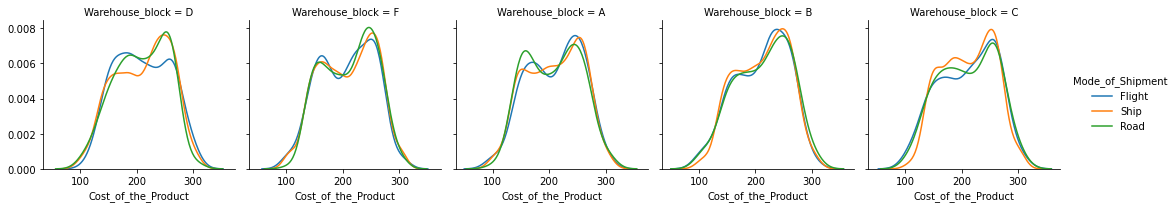

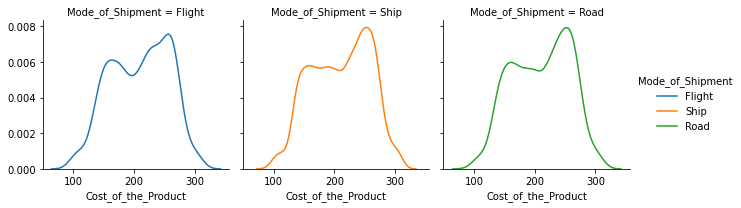

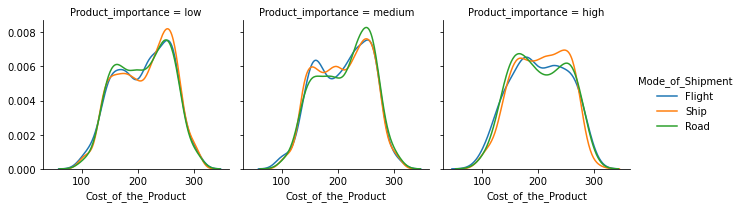

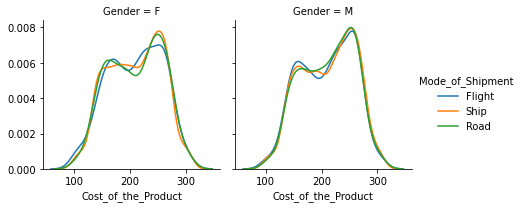

In [200]:
# Relationship between categorical variable and cost of the product.

for col in cat.columns:
    g= sns.FacetGrid(df_ca,col=col,hue='Mode_of_Shipment')
    g.map(sns.kdeplot,'Cost_of_the_Product',alpha=0.7)
    g.add_legend()
    plt.show()


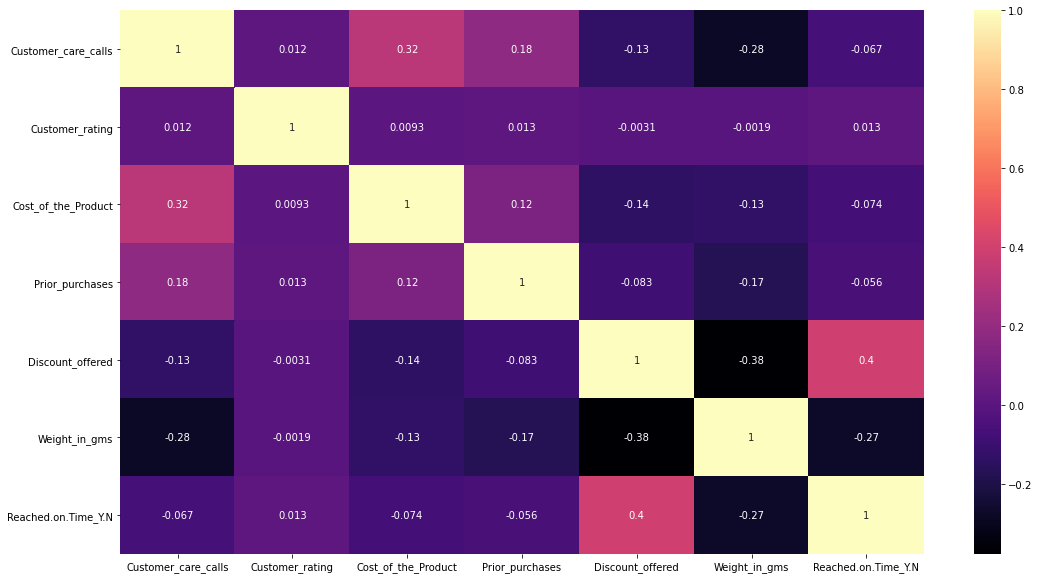

In [201]:
# heat map for multicollinearity
num = num.drop('ID',axis=1)             # ID column will not significantly contribute in  multicollinearity.
plt.figure(figsize=(18,10))

sns.heatmap(num.corr(),annot=True,cmap='magma')
plt.show()

#### Insights<br>
Discount_offered and Cost_of_the_product has positive relation whereas weigh_in_grms has negative relation with Reached.on.Time_Y.N

In [202]:
# encode categorical variable.
cat = pd.get_dummies(cat)

In [203]:
# scaling numerical variable to put all variable on the same scale for better prediction.
num = num.drop('Reached.on.Time_Y.N',axis=1)
sc = StandardScaler()
scaled = sc.fit_transform(num)
num = pd.DataFrame(scaled,columns=num.columns)

In [204]:
# Independent Variable
X = pd.concat([num,cat],axis=1)

# Dependent Variable /Target Variable.
y = df_ca['Reached.on.Time_Y.N']

In [205]:
# Splitting the dataset into training and testing set
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=43)

In [207]:
# model building
rf = RandomForestClassifier(random_state=43)
ad = AdaBoostClassifier(base_estimator=rf)
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=43,solver='lbfgs',max_iter=1000)
rbf = RBF()
gp = GaussianProcessClassifier(1.0*RBF(1.0))
mlp = MLPClassifier(alpha=1,max_iter=1000)
gnb = GaussianNB()

In [213]:
# building various models and compare each.
models = [rf,ad,dt,kn,mlp,lr,gnb]
for model in models:
    model.fit(Xtrain,ytrain)
    y_pred = model.predict(Xtest)
    scores = cross_val_score(model,X,y,cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(ytest,y_pred).round(3)
    ROC = metrics.roc_auc_score(ytest,y_pred).round(3)
    f1_score = metrics.f1_score(ytest,y_pred).round(3)
    print(model,'\n','Accuracy : ',accuracy,'\n','Mean CV score : ',scores,'\n','ROC score : ',ROC,'\n','F1-score : ',f1_score,'\n','Confusion Matrix : \n',confusion_matrix(ytest,y_pred),'\n')

RandomForestClassifier(random_state=43) 
 Accuracy :  0.663 
 Mean CV score :  0.605 
 ROC score :  0.671 
 F1-score :  0.694 
 Confusion Matrix : 
 [[617 255]
 [486 842]] 

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=43)) 
 Accuracy :  0.662 
 Mean CV score :  0.605 
 ROC score :  0.669 
 F1-score :  0.695 
 Confusion Matrix : 
 [[611 261]
 [482 846]] 

DecisionTreeClassifier() 
 Accuracy :  0.64 
 Mean CV score :  0.626 
 ROC score :  0.624 
 F1-score :  0.7 
 Confusion Matrix : 
 [[481 391]
 [402 926]] 

KNeighborsClassifier() 
 Accuracy :  0.64 
 Mean CV score :  0.605 
 ROC score :  0.634 
 F1-score :  0.689 
 Confusion Matrix : 
 [[527 345]
 [448 880]] 

MLPClassifier(alpha=1, max_iter=1000) 
 Accuracy :  0.66 
 Mean CV score :  0.586 
 ROC score :  0.678 
 F1-score :  0.676 
 Confusion Matrix : 
 [[671 201]
 [548 780]] 

LogisticRegression(max_iter=1000, random_state=43) 
 Accuracy :  0.646 
 Mean CV score :  0.595 
 ROC score :  0.636 
 F1-score :  0.6

In [63]:
imp_fea = pd.DataFrame({'Features':X.columns,'Importance':rf.feature_importances_}).sort_values('Importance',ascending=False)

In [64]:
imp_fea

,Features,Importance
5,Weight_in_gms,0.261213
4,Discount_offered,0.223764
2,Cost_of_the_Product,0.169118
3,Prior_purchases,0.067213
1,Customer_rating,0.063833
0,Customer_care_calls,0.057944
10,Warehouse_block_F,0.015228
16,Product_importance_medium,0.013947
15,Product_importance_low,0.013922
13,Mode_of_Shipment_Ship,0.013317


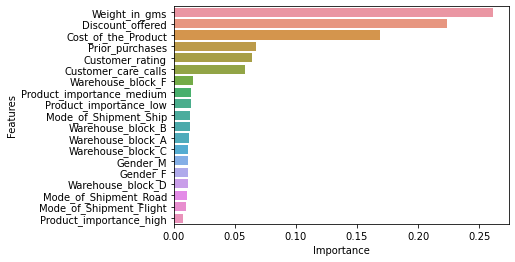

In [67]:
# plot for Showing important features
sns.barplot(imp_fea['Importance'],imp_fea['Features'])
plt.show()